In [1]:
#Projekt č. 1 – konfigurace prostředí

!pip install dash
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import dash
from dash import html, dcc, Input, Output
import threading
from google.colab import output


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 25.9 MB/s eta 0:00:00


In [2]:
#Projekt č. 1 – import dat

df_covid = pd.read_csv('/content/project_1_python.csv')
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180477 entries, 0 to 180476
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    180477 non-null  int64  
 1   iso_code                 180477 non-null  object 
 2   continent                180477 non-null  object 
 3   location                 180477 non-null  object 
 4   date                     180477 non-null  object 
 5   total_cases              173493 non-null  float64
 6   new_cases                173212 non-null  float64
 7   total_deaths             155323 non-null  float64
 8   new_deaths               155095 non-null  float64
 9   hosp_patients            27152 non-null   float64
 10  total_tests              78326 non-null   float64
 11  new_tests                74509 non-null   float64
 12  tests_per_case           92600 non-null   float64
 13  total_vaccinations       46366 non-null   float64
 14  peop

In [3]:
df_obyvatele = df_covid[['location', 'population']].drop_duplicates()
df_obyvatele.head()

,location,population
0,Afghanistan,39835428.0
846,Albania,2872934.0
1691,Algeria,44616626.0
2536,Andorra,77354.0
3375,Angola,33933611.0


In [4]:
df_obyvatele = df_obyvatele.sort_values(by='population', ascending=False).head(15)
df_obyvatele.head()

,location,population
33499,China,1.444216e+09
74570,India,1.393409e+09
170959,United States,3.329151e+08
75441,Indonesia,2.763618e+08
122998,Pakistan,2.251999e+08


<ipython-input-5-2387da7fc6c7>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  obyvatele_graf.set_xticklabels(obyvatele_graf.get_xticklabels(), rotation = 50)


[Text(0, 0, 'China'),
 Text(1, 0, 'India'),
 Text(2, 0, 'United States'),
 Text(3, 0, 'Indonesia'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Brazil'),
 Text(6, 0, 'Nigeria'),
 Text(7, 0, 'Bangladesh'),
 Text(8, 0, 'Russia'),
 Text(9, 0, 'Mexico'),
 Text(10, 0, 'Japan'),
 Text(11, 0, 'Ethiopia'),
 Text(12, 0, 'Philippines'),
 Text(13, 0, 'Egypt'),
 Text(14, 0, 'Vietnam')]

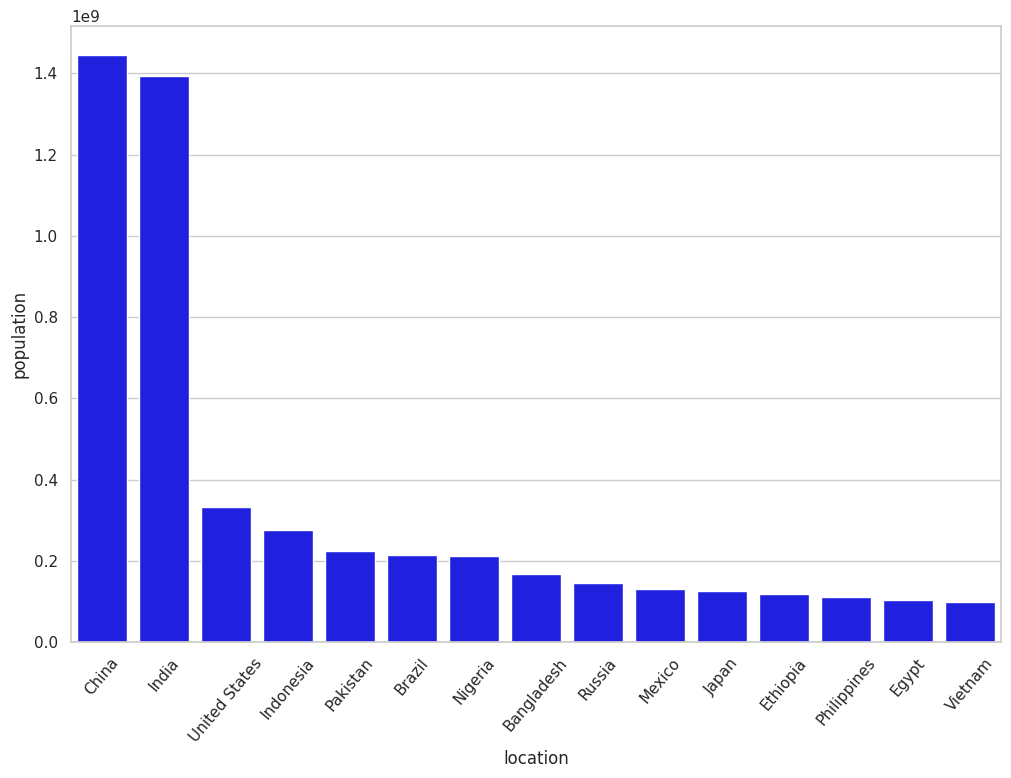

In [5]:
#Projekt #1 - první vizualizace
plt.figure(figsize=(12, 8))
sns.set_theme(style='whitegrid')

obyvatele_graf = sns.barplot(
    x= 'location',
    y= 'population',
    data= df_obyvatele,
    color='blue'
)

obyvatele_graf.set_xticklabels(obyvatele_graf.get_xticklabels(), rotation = 50)

In [6]:
df_obyvatele_zivot = df_covid[['location', 'population', 'continent', 'life_expectancy']].drop_duplicates()
df_obyvatele_zivot.head()

,location,population,continent,life_expectancy
0,Afghanistan,39835428.0,Asia,64.83
846,Albania,2872934.0,Europe,78.57
1691,Algeria,44616626.0,Africa,76.88
2536,Andorra,77354.0,Europe,83.73
3375,Angola,33933611.0,Africa,61.15


In [7]:
#Projekt č. 1 – populace vs. délka života

graf_obyvatele = px.scatter(
    data_frame= df_obyvatele_zivot,
    x = 'population',
    y = 'life_expectancy',
    color = 'continent',
    color_discrete_sequence= px.colors.qualitative.Plotly,
    title='Life expectancy vs. population by continent',
    log_x= True
)

graf_obyvatele

In [8]:
#Projekt č. 1 - počet diagnostikovaných případů

nove_pripady = df_covid[['location', 'date', 'new_cases']]
states = ['Bahamas', 'Cyprus']
nove_pripady = nove_pripady[nove_pripady['location'].isin(states)]
graf_nove_pripady = px.line(
    data_frame = nove_pripady,
    x= 'date',
    y= 'new_cases',
    color = 'location',
    color_discrete_sequence=px.colors.qualitative.T10,
  title='COVID-19 - new cases daily in Russia and Germany')



graf_nove_pripady

In [9]:
#Projekt č. 1 – mapa COVID-19

df_map = df_covid[df_covid['date'] == df_covid['date'].max()]
df_map['cases_per_person'] = df_map['total_cases'] / df_map['population']
my_mapbox_token = 'pk.eyJ1IjoiYmFzZW5rYSIsImEiOiJjbTA1Ymw0azQwZXdyMmtzZ2Jld254ZGhiIn0.LziFztq0tizuib-MDI0ZOQ'
px.set_mapbox_access_token(my_mapbox_token)


cases_map = px.scatter_mapbox(data_frame=df_map,
                                  lat='latitude', lon='longitude',
                                  color='continent',
                                  size='cases_per_person',
                                  size_max=20,
                                  hover_data={'location': True,
                                              'total_cases': True,
                                              'continent': False,
                                              'cases_per_person': False,
                                              'latitude': False,
                                              'longitude': False,
                                              },
                                  zoom=1,
                                  mapbox_style='dark',
                                  title='COVID-19 map - positive cases per person')
cases_map

<ipython-input-9-54815d488bf2>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
#Projekt č. 1 – řídicí panel č. 1

df_dash_one = df_covid
zeme_seznam = list(df_dash_one['location'].drop_duplicates())


first_dash_app = dash.Dash()
first_dash_app.layout = html.Div([
    html.Div([
        html.H1('Covid 19 Tracker'),
    ],id='Nadpis'),
    html.P('Choose country:'),
    dcc.Dropdown(
        id='country',
        options=[{
          'value': str(country), 'label': country}
               for country in zeme_seznam],
        value= zeme_seznam[0]
    ),
    html.Br(),
    html.Div(children=[
        dcc.Graph(id="graph-1", style={'display': 'inline-block', 'width': '48%'}),
        dcc.Graph(id="graph-2", style={'display': 'inline-block', 'width': '48%'})
])
    ])


In [11]:
@first_dash_app.callback(
    Output(component_id='graph-1', component_property='figure'),
    Input(component_id='country', component_property='value')
)
def generate_first_graph(country):
    df = df_dash_one[df_dash_one['location'] == country]
    fig = px.line(
        data_frame=df,
        x='date',
        y='total_cases',
        title=f'Cumulative number of positive cases in {country}',
        labels={'total_cases': 'Total cases'}
    )
    return fig

In [12]:
@first_dash_app.callback(
    Output(component_id='graph-2', component_property='figure'),
    Input(component_id='country', component_property='value')
)
def generate_second_graph(country):
    df = df_dash_one[df_dash_one['location'] == country]
    fig = px.line(
        data_frame=df,
        x='date',
        y='total_deaths',
        title=f'Cumulative number of deaths in {country}',
        labels={'total_deaths': 'Total deaths'}
    )
    return fig

In [13]:
thread = threading.Thread(target=first_dash_app.run_server)
thread.start()
output.serve_kernel_port_as_window(port=8050)


<IPython.core.display.Javascript object>

In [14]:
#Projekt č. 1 – řídicí panel č. 2

df_dash_2 = df_covid[df_covid['date'] == df_covid['date'].max()].fillna(0)

metric_dict = {'total_cases': 'Total cases',
               'total_deaths': 'Total deaths',
               'total_tests': 'Total tests',
               'total_vaccinations': 'Total vaccinations',
               'people_fully_vaccinated': 'Number of fully vaccinated people'}

continent_list = list(df_dash_2['continent'].drop_duplicates())


<IPython.core.display.Javascript object>

In [15]:
second_dash_app = dash.Dash()

second_dash_app.layout = html.Div([
    html.Div([
        html.H1('COVID-19 Tracker')
    ]),
    html.P("Choose continent:"),
    dcc.Dropdown(
        id='continent',
        options=[{'value': str(continent), 'label': continent}
                 for continent in continent_list],
        value=continent_list[0]
        ),
    html.P("Choose metric:"),
    dcc.Dropdown(
        id='metric',
        options=[{'value': metric, 'label': metric_label}
                 for metric, metric_label in metric_dict.items()],
        value='total_cases'
        ),
    html.Br(),
    html.Div(children=[
        dcc.Graph(id="map"),
    ])

])



In [16]:
@second_dash_app.callback(
    Output(component_id='map', component_property='figure'),
    [Input(component_id='continent', component_property='value'),
    Input(component_id='metric', component_property='value')]
)
def generate_covid_map(continent, metric):
    df = df_dash_2[df_dash_2['continent'] == continent]
    map = px.scatter_mapbox(
        data_frame=df,
        lat='latitude',
        lon='longitude',
        size=df[metric],
        size_max=20,
        hover_data={'location': True},
        mapbox_style='dark',
        zoom=1,
        height=600,
        title=f'COVID-19 - {metric_dict[metric]} in {continent}'
    )
    return map


In [17]:
thread = threading.Thread(target=second_dash_app.run_server)
thread.start()
output.serve_kernel_port_as_window(port=8050)


<IPython.core.display.Javascript object>

In [30]:
#Projekt č. 1 – řídicí panel č. 3
third_dash_app = dash.Dash()

third_dash_app.layout = html.Div([
    html.Div([
        html.H1('COVID-19 Tracker')
    ]),
    html.P("Choose top x countries:"),
    dcc.Slider(5, 20, 5,
        value=5,
        id='my-slider'
    ),
    html.Br(),
    html.Div(children=[
        dcc.Graph(id='first-graph', style={'display':'inline-block', 'width': '48%'}),
        dcc.Graph(id='second-graph', style={'display':'inline-block', 'width': '48%'})
    ])

])



In [31]:
@third_dash_app.callback(
    Output(component_id='first-graph', component_property='figure'),
    [Input(component_id='my-slider', component_property='value')]
)
def generate_vaccinations_graph(n):
    max_date = df_covid['date'].max()
    df = df_covid[df_covid['date'] == max_date].sort_values(by='total_vaccinations', ascending=False).head(n).fillna(0)
    fig = px.bar(
        data_frame=df,
        x='location',
        y='total_vaccinations',
        title=f'Number of vaccinations',
        labels={'total_vaccinations': 'Total vaccinations'}
    )
    return fig





In [32]:
@third_dash_app.callback(
    Output(component_id='second-graph', component_property='figure'),
    [Input(component_id='my-slider', component_property='value')]
)
def generate_vaccination_ratio_graph(n):
    max_date = df_covid['date'].max()
    df = df_covid[df_covid['date'] == max_date]
    df['vaccination_ratio'] = df['total_vaccinations'] / df['population']
    df = df.sort_values(by='vaccination_ratio', ascending=False).head(n).fillna(0)
    fig = px.bar(
        data_frame=df,
        x='location',
        y='vaccination_ratio',
        title=f'Vaccination ratio',
        labels={'vaccination_ratio': 'Vaccination ratio'}
    )
    return fig



In [34]:
thread = threading.Thread(target=third_dash_app.run_server)
thread.start()
output.serve_kernel_port_as_window(port=8050)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>